Enter the path of the image: C:\Users\Laptop\Downloads\image_registration_dataset\image_registration_dataset\pisa_register.jpg


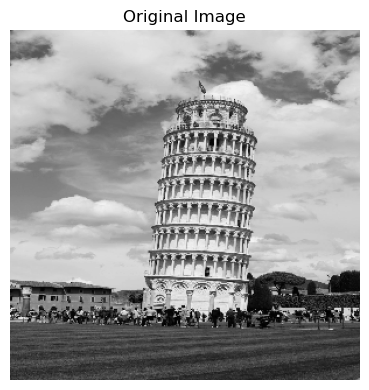

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


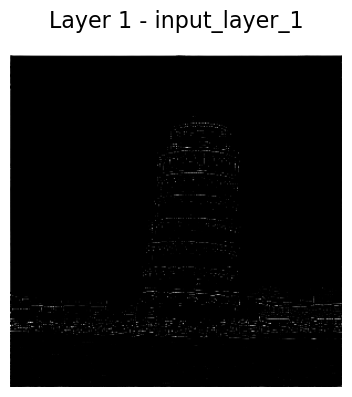

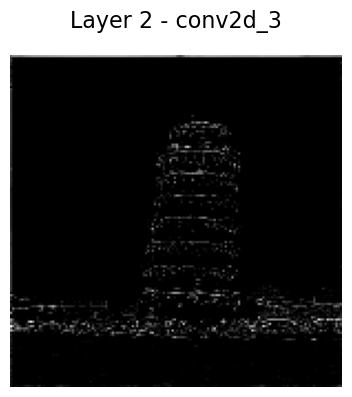

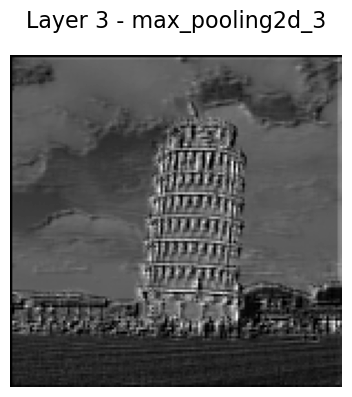

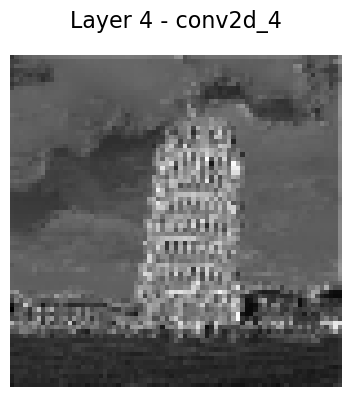

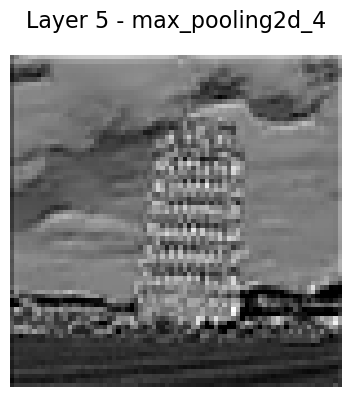

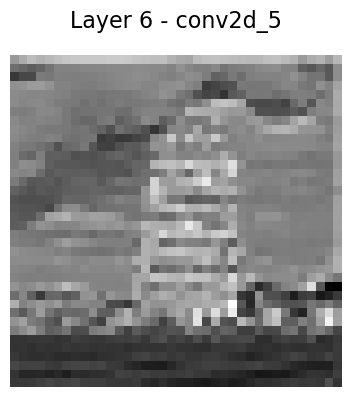

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure', autolayout=True)
plt.rc('image', cmap='viridis')

def load_n_process_img(img_path):
   
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, size=[300, 300])
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    
    return img

def cnn_model():
    
    inputs = tf.keras.Input(shape=(300, 300, 1))
    x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    
    return model

def disp_layer(model, img):
    
    original_img = tf.squeeze(img).numpy()
    plt.figure(figsize=(4, 4))
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')
    plt.title("Original Image")
    plt.show()
    
    
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
    activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
    
    activations = activation_model.predict(img)
    
    for i, activation in enumerate(activations):
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        fig.suptitle(f'Layer {i+1} - {model.layers[i].name}', fontsize=16)
        
        ax.imshow(activation[0, :, :, 0], cmap='gray') #disp o/p of first filter for each layer
        ax.axis('off')
        
        plt.show()
        
def main():
    
    img_path = input("Enter the path of the image: ")
    
   
    img = load_n_process_img(img_path)
    
    
    model = cnn_model()
    
    disp_layer(model, img)
    
if __name__ == "__main__":
    main()

In [ ]:
# Imports
# tensorflow as tf:
# TensorFlow is an open-source library used for numerical computation and machine learning. Here it is used to define a Convolutional Neural Network (CNN) model and process input images.
# matplotlib.pyplot as plt:
# This library is used to visualize data. The plt.rc configurations set the layout and colormap globally for the figures.


# Functions
# load_n_process_img(img_path):
# This function loads, processes, and prepares an image for input into the CNN.
# Steps:
# tf.io.read_file(img_path): Reads the image from the given file path as raw data.
# tf.io.decode_jpeg(img, channels=1): Decodes the image into a tensor and converts it to grayscale (channels=1).
# tf.image.resize(img, size=[300, 300]): Resizes the image to 300x300 pixels for uniformity.
# tf.image.convert_image_dtype(img, dtype=tf.float32): Normalizes pixel values to the range [0, 1].
# tf.expand_dims(img, axis=0): Adds a batch dimension (1, 300, 300, 1) for compatibility with the model.
# Returns: Preprocessed image tensor.


# cnn_model():
# Defines a CNN model with three convolutional layers and max-pooling layers.
# Layers:
# tf.keras.Input: Specifies the input shape (300, 300, 1).

# Convolutional Layers:
# tf.keras.layers.Conv2D(filters, kernel_size, activation, padding):
# filters: Number of feature detectors.
# kernel_size: Size of the convolutional filter (3x3 in this case).
# activation='relu': Applies ReLU activation to introduce non-linearity.
# padding='same': Keeps the output size the same as the input size.
# Pooling Layers:
# tf.keras.layers.MaxPooling2D(pool_size, padding):
# Reduces spatial dimensions while retaining key features.
# pool_size=(2, 2): Downscales by a factor of 2.
# padding='same': Keeps the output dimensions consistent.
# Returns: A CNN model instance.


# disp_layer(model, img):
# Displays the original image and visualizations of activations from each convolutional and pooling layer.
# Steps:
# Original Image:
# tf.squeeze(img).numpy(): Removes the batch dimension and converts the tensor to a NumPy array for visualization.
# plt.imshow: Displays the image in grayscale.

# Activation Model:
# layer_outputs: Collects the outputs of all convolutional and pooling layers.
# tf.keras.Model(inputs, outputs): Creates a model to output activations of intermediate layers.
# activation_model.predict(img): Generates activations for the input image.

# Visualization:
# For each activation:
# Extracts the first filter's output for visualization.
# Displays the activations for each layer using plt.imshow.


# main():
# Drives the program by:
# Accepting the image file path.
# Preprocessing the image.
# Creating the CNN model.
# Displaying activations of each layer for the input image.



# Theoretical Explanation of CNN
# A Convolutional Neural Network (CNN) is a deep learning architecture commonly used for image and video processing tasks. 
# It automatically extracts spatial features from images.

# Key Components:
# Convolutional Layer:
# Applies a filter (kernel) to extract local features like edges, textures, and patterns.
# Produces a feature map representing these detected features.

# Activation Function:
# Typically uses ReLU (max(0, x)) to introduce non-linearity, allowing the model to learn complex patterns.

# Pooling Layer:
# Downsamples the feature map, reducing dimensions while retaining important features.
# Enhances computational efficiency and reduces overfitting.

# Fully Connected Layer:
# Converts the extracted features into a flattened array for classification or regression tasks.

# Advantages:
# Automatically detects important features.
# Reduces the need for manual feature engineering.


# Question 1:
# Why is the batch dimension added in tf.expand_dims(img, axis=0)?
# Answer: The batch dimension is added to make the image compatible with the CNN model, which expects inputs in the shape (batch_size, height, width, channels).

# Question 2:
# What is the purpose of max-pooling in the CNN model?
# Answer: Max-pooling reduces the spatial dimensions of the feature maps, retaining only the most prominent features in a region. This reduces computational complexity and helps in preventing overfitting.

# Question 3:
# How does ReLU activation help in CNNs?
# Answer: ReLU (Rectified Linear Unit) introduces non-linearity by setting all negative values in the feature map to zero. This helps the network learn complex patterns in data.

# Question 4:
# What will happen if we don’t normalize pixel values in the image preprocessing step?
# Answer: If pixel values are not normalized, the model may take longer to converge as the scale of input features can vary significantly, leading to unstable gradients during training.

# Question 5:
# Why is the padding='same' parameter used in the convolutional layers?
# Answer: padding='same' ensures the output feature map has the same spatial dimensions as the input, which is helpful in maintaining consistency across layers.

# Question 6:
# What modifications would you make to this code to train the model for classification?
# Answer: To train the model:
# Add fully connected layers after the convolutional layers.
# Define an output layer with softmax activation for classification.
# Compile the model using an optimizer (e.g., Adam) and a loss function (e.g., categorical crossentropy).
# Use a dataset with labels and call model.fit() for training.

# Q: If a larger kernel like 5x5 is used instead of 3x3 in this code, what would be the trade-offs?
# The kernel size in a Convolutional Neural Network (CNN) determines the size of the filter that slides across the input feature map to extract features. 
# A 3x3 kernel is commonly used in CNNs because it provides an excellent balance between computational efficiency and the ability to capture complex patterns and Flexibility with Padding.
# Answer:
# Advantages:
# A 5x5 kernel captures more global patterns in a single convolution.
# Disadvantages:
# Increased computational cost and number of parameters.
# Higher risk of overfitting with a small dataset.
# May smooth out finer details that are better captured by smaller kernels.